<a href="https://colab.research.google.com/github/andrewseltzer99/DummyClassifier-Partition-Split-Displaying-Results/blob/main/DummyClassifier_Partition_Split_%26_Displaying_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset you will analyze in this HW is the RMS Titanic. https://en.wikipedia.org/wiki/RMS_Titanic.

Your goal is to classify survivability based on the various factors of the passengers. 

For our problem, we will choose the factors listed below:

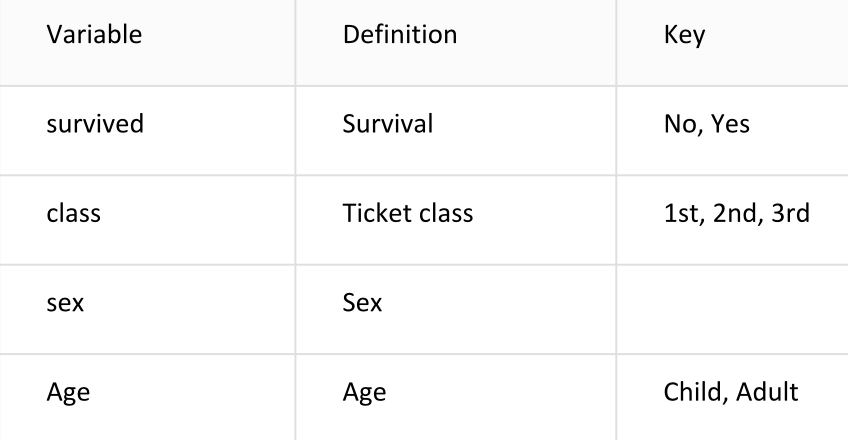

The dataset we will be using can be found in the shared dataset folder. The file name is Titanic.csv

1. Read the dataset into a dataframe. Display the first 5 rows of the dataframe. (2)
2. Explore the dataset and determine what is the target variable. (2)
3. Drop factor(s) that are not likely to be relevant for logistic regression. (2)
4. Make sure there are no missing values. Handle missing values if any. (2)
5. Plot count plots of each of the remaining factors (including the target variable). (3)
6. Convert all categorical feature variables into dummy variables. (3)
7. Partition the data into train and test sets (70/30). Use random_state = 2020. (2)
8. Fit the training data to a logistic regression model. (2)
9. Predict the outcomes for the test set. (2)
10. Display the accuracy of your predictions for survivability. (2)
11. Display the confusion matrix along with the labels (Yes, No).
Hint: You may want to use from sklearn.metrics import plot_confusion_matrix (2)
12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class. (3)
13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class. (3)

In [ ]:
# import all necessary libraries here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

   Passenger Class   Sex    Age Survived
0          1   3rd  Male  Child       No
1          2   3rd  Male  Child       No
2          3   3rd  Male  Child       No
3          4   3rd  Male  Child       No
4          5   3rd  Male  Child       No
5          6   3rd  Male  Child       No
6          7   3rd  Male  Child       No
7          8   3rd  Male  Child       No
8          9   3rd  Male  Child       No
9         10   3rd  Male  Child       No


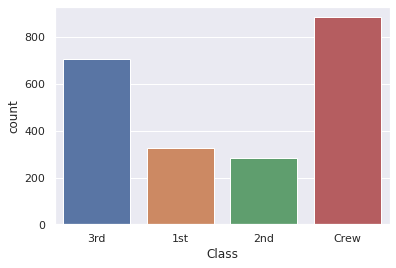

In [ ]:
# Type solution here
x_new = [0,0,1,0,0,1]
#model.predict(x_new)
#model.predict_proba

# 12 create a datapoint that would represent a male in the 3rd class, model.predict and give it the new datapoint
#1
data = pd.read_csv('Titanic.csv')
#2
print(data.head(10))
# the target variable is survived, as we want to see if we could predict who would survive
#3
df = data[['Class', 'Sex', 'Age', 'Survived']].copy()
# 4 is this right?
df.dropna()
# 5
import seaborn as sns
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="Class", data=df)


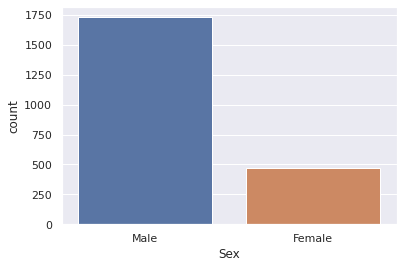

In [ ]:
ax1 = sns.countplot(x="Sex", data=df)

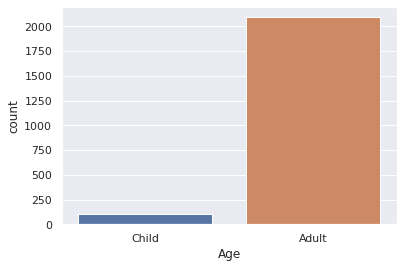

In [ ]:
ax2 = sns.countplot(x="Age", data=df)

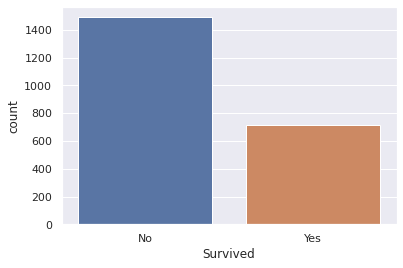

In [ ]:
ax3 = sns.countplot(x="Survived", data=df)

In [ ]:
# 6 
df2 = pd.get_dummies(df,columns=['Class', 'Sex', 'Age'])
df2

,Survived,Class_1st,Class_2nd,Class_3rd,Class_Crew,Sex_Female,Sex_Male,Age_Adult,Age_Child
0,No,0,0,1,0,0,1,0,1
1,No,0,0,1,0,0,1,0,1
2,No,0,0,1,0,0,1,0,1
3,No,0,0,1,0,0,1,0,1
4,No,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
2196,Yes,0,0,0,1,1,0,1,0
2197,Yes,0,0,0,1,1,0,1,0
2198,Yes,0,0,0,1,1,0,1,0
2199,Yes,0,0,0,1,1,0,1,0


[[413  34]
 [ 99 115]]
Accuracy: 0.7987897125567323


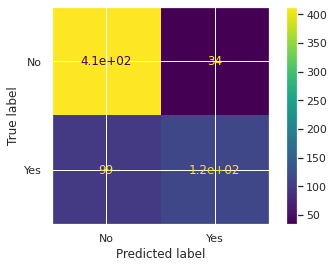

In [ ]:
# 7
from sklearn.model_selection import train_test_split
x = df2.iloc[:, 1:]
y = df2.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2020, stratify=y)
# 8 
from sklearn.linear_model import LogisticRegression

# instantiate the model (using default parameters)
logReg = LogisticRegression()

# fit the model with data
logReg.fit(X_train, y_train)
# 9
# make predictions
y_pred = logReg.predict(X_test)

# 10
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

# 11
metrics.plot_confusion_matrix(logReg, X_test, y_test)



In [ ]:
# 12
print(logReg.predict([[0,0,1,0,0,1,1,0]]))

# 13
print(logReg.predict_proba([[0,0,1,0,0,1,1,0]]))

['No']
[[0.87759305 0.12240695]]
